In [21]:
import math
import time
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

In [51]:
@dataclass
class Genetic:
    best_fitness: int
    average_fitness: float

    def __init__(self, best, avg):
        self.best_fitness = best
        self.average_fitness = avg

In [23]:
class Evolution():
    def __init__(self, max = 256, size=10, base = 8):
        self.size = size
        self.base = base
        self.max = max
        self.generations = []
        self.first_gen = np.random.randint(0, max, size=size)
        self.generations.append(self.first_gen)
        self.target = np.random.randint(0, max)

    def mutation(self, x: int):
        start = np.random.randint(0, math.floor(self.base/2))
        end = np.random.randint(start, math.floor(self.base))
        x_string = str(bin(x))[2:]

        if len(x_string) != self.base:
            for i in range(self.base-len(x_string)):
                x_string = '0' + x_string

        x_string = list(x_string)
        for i in range(start, end):
            x_string[i] = '1' if x_string[i] == '0' else '0'

        return int(''.join(x_string), 2)

    def crossover(self, x, y):
        rand = np.random.randint(0, 2)
        x_string = str(bin(x if rand == 0 else y))[2:]
        y_string = str(bin(x if rand == 1 else y))[2:]
        n = 0
        if len(x_string) % 2 == 0:
            n = len(x_string) / 2
        else:
            if self.fitness(x if rand == 0 else y) > self.fitness(x if rand == 1 else y):
                n = math.ceil(len(x_string) / 2)
            else:
                n = math.floor(len(x_string) / 2)

        n = int(n)
        child = x_string[:n]+y_string[n:]
        return int(child, 2)

    def fitness(self, x: int):
        return -np.abs(x - self.target)

    def get_new_crossover(self, generation: zip):
        new_generation = []
        t = 0
        best = 0
        second = 0

        for i in range(len(generation)):
            if best > generation[i][0] > second != generation[i][1]:
                second = generation[i][1]

            if generation[i][0] > best != generation[i][1]:
                second = best
                best = generation[i][1]

        for i in generation:
            new_generation.append(self.crossover(i[1], best))
            new_generation.append(self.crossover(i[1], second))

        return new_generation

    def get_new_generation(self, old_generation):
        new_generation = self.get_new_crossover(old_generation)

        for i in np.random.randint(0, self.size, size=math.floor(self.size/2)):
            new_generation[i] = self.mutation(new_generation[i])

        return new_generation

    def train(self):
        i = 0
        train_fitness = []
        while True:

            fitnesses = [self.fitness(x) for x in self.generations[i]]
            train_fitness.append(fitnesses)
            # Pick 5 best numbers
            generation = sorted(zip(fitnesses, self.generations[i]), reverse=True)[:(math.floor(self.size/2))]
            if max(fitnesses) == 0:
                print(self.generations)
                return [Genetic(max(f), sum(f)/len(f)) for f in train_fitness], self.generations

            new_generation = self.get_new_generation(generation)
            #print(new_gen)
            #print(self.target)
            self.generations.append(new_generation)

            i += 1

    def train_time(self):
        i = 0
        train_time = []

        for t in range(20):
            print(i)
            start_time = time.time()
            while True:

                fitnesses = [self.fitness(x) for x in self.generations[i]]
                # Pick 5 best numbers
                generation = sorted(zip(fitnesses, self.generations[i]), reverse=True)[:(math.floor(self.size/2))]
                if max(fitnesses) == 0:
                    end_time = time.time()
                    train_time.append(end_time-start_time)
                    break
        
                new_generation = self.get_new_generation(generation)
                self.generations.append(new_generation)

                i += 1

        return sum(train_time)/len(train_time)

In [24]:
def print_genetics(genetic, best, average, i):
    print(f"Genetic {i}: ")
    print(genetic)
    print(f"Best Fitness: {best}")
    print(f"Average Fitness: {average}")
    print("")

In [92]:
def task1():
    evo = Evolution()
    x_axis = []
    y_axis_best = []
    y_axis_avg = []

    genetic, genetics = evo.train()

    for i in range(len(genetics)):
        print_genetics(genetics[i], genetic[i].best_fitness, genetic[i].average_fitness, i)
        x_axis.append(i)
        y_axis_best.append(genetic[i].best_fitness)
        y_axis_avg.append(genetic[i].average_fitness)
    
    plt.plot(x_axis, y_axis_best, label="Best fitness", color="Green")
    plt.plot(x_axis, y_axis_avg, label="Average fitness", color="Pink")
    plt.xlabel("Runs")
    plt.ylabel("Green: Best, Pink: Avg")
    plt.show()
    print(f"Target: {evo.target}")
    print(f"Runs: {i}")

In [26]:
def task2():
    n = np.arange(8, 18)
    time  = []

    for i in range(8, 18):
        evo = Evolution(2**i, 20, i)
        time.append(evo.train_time())
        print(f"Done with: {2**i}")
        print(f"Target: {evo.target}")
    plt.xlabel("Bit length")
    plt.ylabel("Time (s)")
    plt.plot(n, time)
    plt.show()

[array([121,  37, 250, 159,  37, 141, 233,  25, 255,  30]), [129, 121, 52, 179, 159, 159, 4, 37, 85, 213], [15, 241, 129, 8, 10, 85, 143, 249, 9, 9], [141, 8, 85, 10, 145, 8, 119, 3, 22, 2], [14, 119, 121, 85, 253, 141, 145, 9, 102, 22], [119, 14, 121, 121, 230, 102, 18, 85, 149, 36], [14, 55, 15, 121, 15, 101, 12, 136, 20, 10], [23, 15, 12, 29, 8, 8, 55, 55, 214, 5], [15, 215, 6, 6, 29, 249, 5, 43, 3, 3], [43, 43, 7, 7, 51, 253, 215, 201, 3, 3], [51, 6, 5, 5, 91, 27, 201, 12, 243, 13], [103, 91, 6, 6, 155, 27, 201, 18, 13, 27], [108, 12, 75, 139, 155, 155, 27, 27, 198, 24], [108, 108, 139, 8, 75, 123, 227, 165, 17, 113], [113, 14, 13, 148, 108, 108, 207, 7, 8, 115], [141, 113, 14, 115, 116, 172, 116, 49, 9, 9], [113, 17, 62, 115, 112, 116, 14, 116, 147, 141]]
Genetic 0: 
[121  37 250 159  37 141 233  25 255  30]
Best Fitness: -9
Average Fitness: -80.6

Genetic 1: 
[129, 121, 52, 179, 159, 159, 4, 37, 85, 213]
Best Fitness: -9
Average Fitness: -55.8

Genetic 2: 
[15, 241, 129, 8, 10, 8

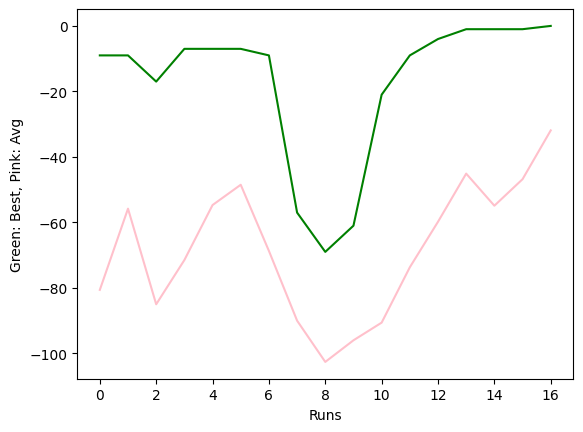

Target: 112
Runs: 16


In [93]:
task1()

0
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
Done with: 256
Target: 40
0
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
Done with: 512
Target: 58
0
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
Done with: 1024
Target: 530
0
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
Done with: 2048
Target: 49
0
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
Done with: 4096
Target: 615
0
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
Done with: 8192
Target: 5692
0
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
Done with: 16384
Target: 3253
0
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
Done with: 32768
Target: 11920
0
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
Done with: 65536
Target: 47726
0
18298
18298
18298
18298
18298
18298
18298
18298
18298
18298

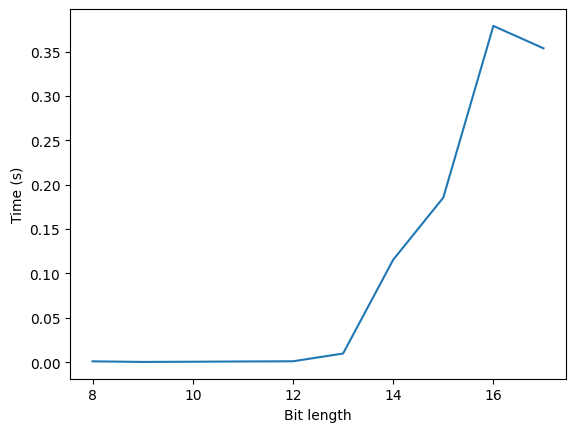

In [28]:
task2()